<a href="https://colab.research.google.com/github/techut30/Assignment-KMeans/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

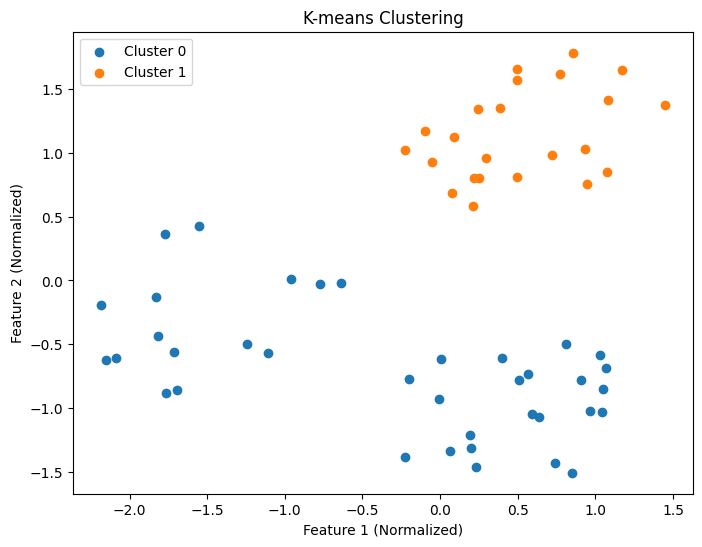

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def normalize(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    normalized_X = (X - means) / stds
    return normalized_X

def kmeans(X, k, max_iterations=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)
        new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    return clusters

data = pd.read_csv("kmeans - kmeans_blobs.csv")
X = data.values

X_normalized = normalize(X)

k = 2
clusters = kmeans(X_normalized, k)

plt.figure(figsize=(8, 6))
for cluster_num in range(k):
    plt.scatter(X_normalized[clusters == cluster_num, 0], X_normalized[clusters == cluster_num, 1], label=f'Cluster {cluster_num}')
plt.title('K-means Clustering')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.legend()
plt.show()
